<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="nematoda"
dataset = 1
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 1, con valores atípicos.
Valores del documento csv.

         X0     X1     X2     X3     X4      X5     X6      X7     X8      X9  \
0     4.457  8.357  3.621  6.407  2.228   5.571  4.178  16.713  1.950   4.457   
1    10.423  4.560  3.583  3.257  0.977   3.583  1.954   4.235  1.629   8.795   
2    11.526  2.804  4.984  5.296  4.050   5.296  2.804   3.738  2.492   5.607   
3     3.462  6.154  4.615  3.846  3.462   6.154  4.615   9.231  3.077   4.231   
4     4.202  7.563  5.882  2.521  2.521   6.723  8.403   8.403  2.521   3.361   
..      ...    ...    ...    ...    ...     ...    ...     ...    ...     ...   
495   7.226  5.128  3.030  5.711  1.515   7.692  3.147   6.061  2.448   5.245   
496   8.929  5.357  5.357  7.143  1.786   5.357  0.000   1.786  3.571   5.357   
497   4.044  5.699  4.596  6.985  1.654   7.537  6.618   4.412  2.206   6.250   
498   6.757  2.703  8.108  4.054  0.000   6.757  1.351   1.351  0.0

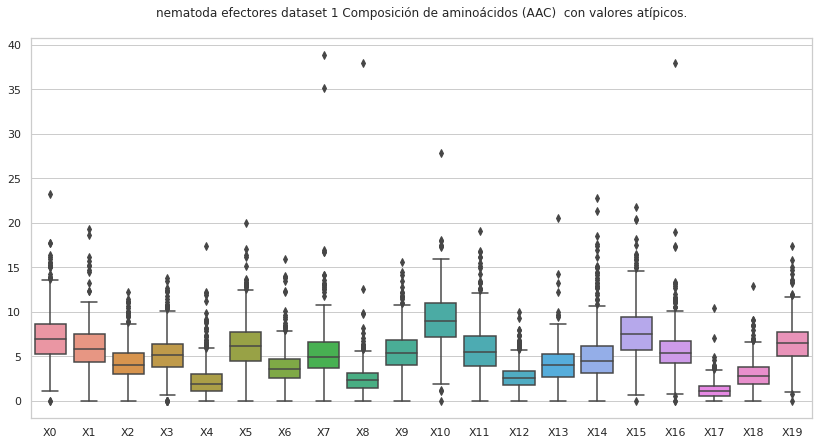

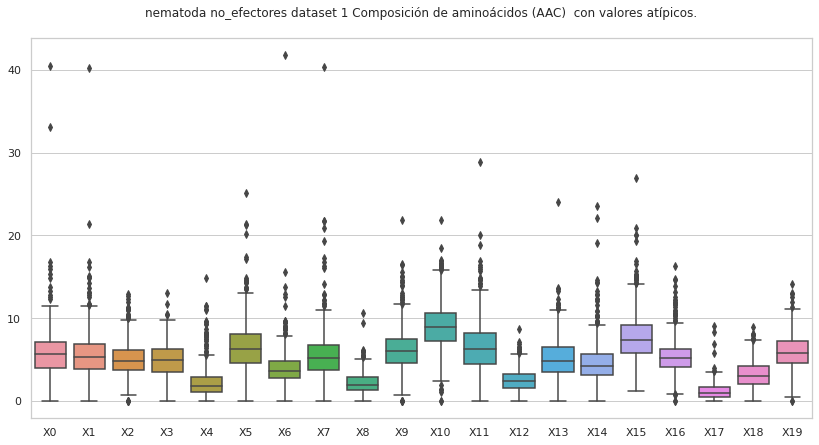

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 1, sin valores atípicos.
Valores del documento csv.

         X0     X1     X2      X3     X4      X5     X6     X7     X8      X9  \
1    10.423  4.560  3.583   3.257  0.977   3.583  1.954  4.235  1.629   8.795   
2    11.526  2.804  4.984   5.296  4.050   5.296  2.804  3.738  2.492   5.607   
3     3.462  6.154  4.615   3.846  3.462   6.154  4.615  9.231  3.077   4.231   
5     6.050  8.897  3.203   8.185  0.356   6.762  4.270  3.915  1.423   6.050   
6     4.938  8.642  3.704  11.111  7.407   6.173  3.704  8.642  0.000   4.938   
..      ...    ...    ...     ...    ...     ...    ...    ...    ...     ...   
495   7.226  5.128  3.030   5.711  1.515   7.692  3.147  6.061  2.448   5.245   
496   8.929  5.357  5.357   7.143  1.786   5.357  0.000  1.786  3.571   5.357   
497   4.044  5.699  4.596   6.985  1.654   7.537  6.618  4.412  2.206   6.250   
498   6.757  2.703  8.108   4.054  0.000   6.757  1.351  1.351  0.0

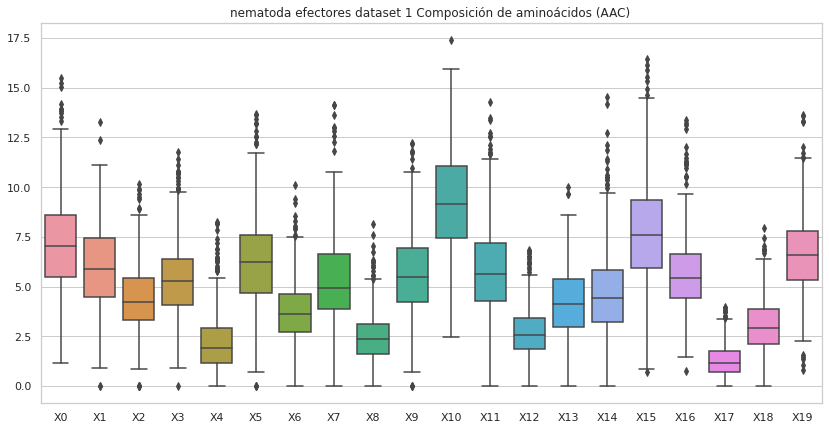

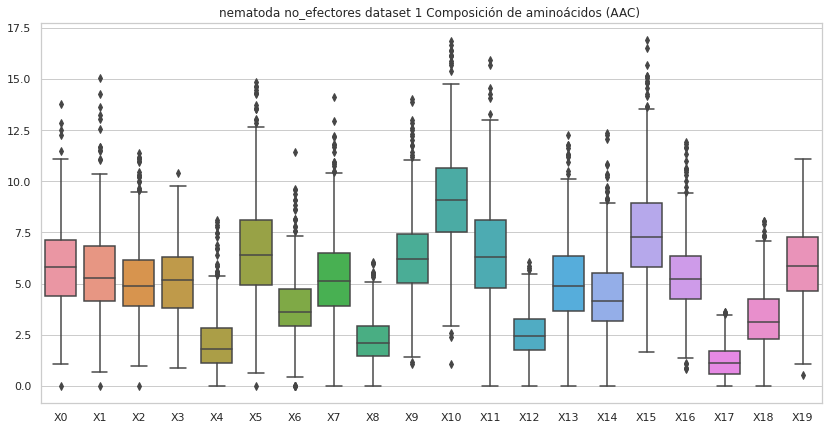

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.007836  0.003918  0.011265  0.009795  0.002939  0.029386  0.003428   
1    0.030037  0.002816  0.009387  0.010325  0.020651  0.012203  0.004693   
2    0.057628  0.020248  0.026478  0.026478  0.023363  0.018690  0.012460   
3    0.015188  0.015188  0.016876  0.027001  0.015188  0.040502  0.013501   
4    0.055468  0.033281  0.033281  0.088749  0.066562  0.110936  0.033281   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.039120  0.008203  0.030917  0.041644  0.018929  0.032810  0.013250   
496  0.041172  0.008234  0.032938  0.024703  0.024703  0.008234  0.016469   
497  0.040104  0.016406  0.069271  0.074739  0.051042  0.043750  0.021875   
498  0.095446  0.000000  0.057268  0.095446  0.076357  0.019089  0.000000   
499  0.0

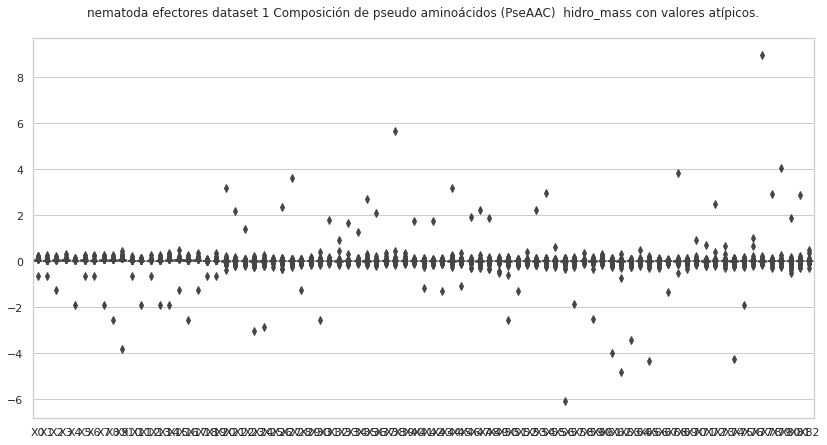

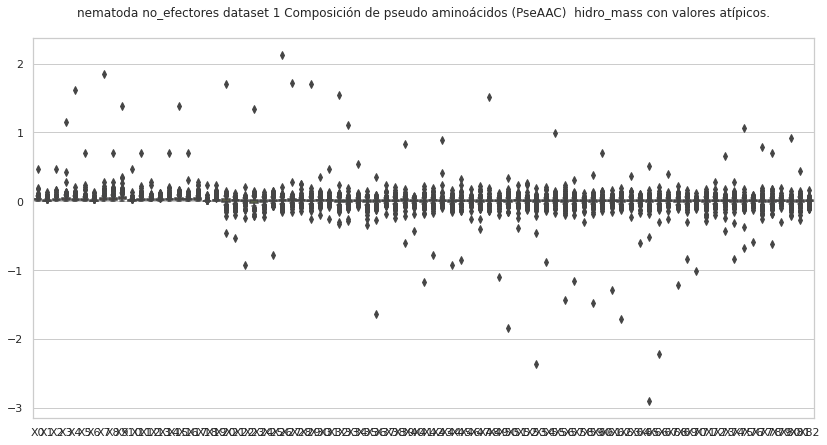

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.007836  0.003918  0.011265  0.009795  0.002939  0.029386  0.003428   
1    0.030037  0.002816  0.009387  0.010325  0.020651  0.012203  0.004693   
2    0.057628  0.020248  0.026478  0.026478  0.023363  0.018690  0.012460   
3    0.015188  0.015188  0.016876  0.027001  0.015188  0.040502  0.013501   
5    0.028093  0.001653  0.038008  0.031398  0.016525  0.018178  0.006610   
..        ...       ...       ...       ...       ...       ...       ...   
494  0.045026  0.019297  0.033591  0.030732  0.026444  0.032161  0.015009   
495  0.039120  0.008203  0.030917  0.041644  0.018929  0.032810  0.013250   
496  0.041172  0.008234  0.032938  0.024703  0.024703  0.008234  0.016469   
497  0.040104  0.016406  0.069271  0.074739  0.051042  0.043750  0.021875   
499  0.0

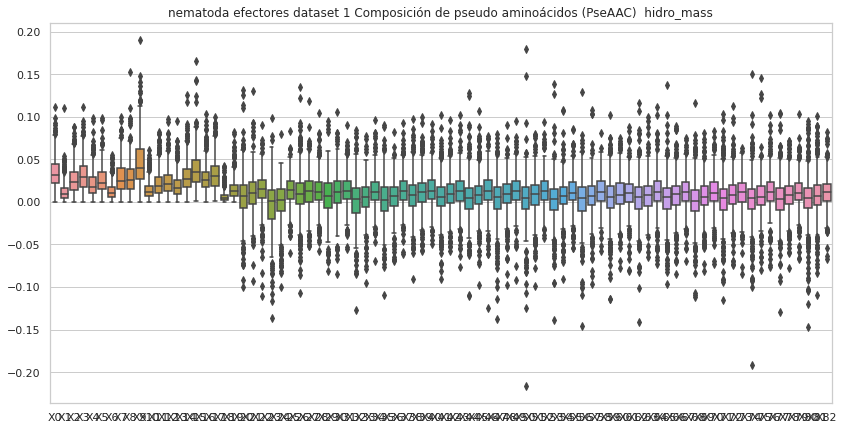

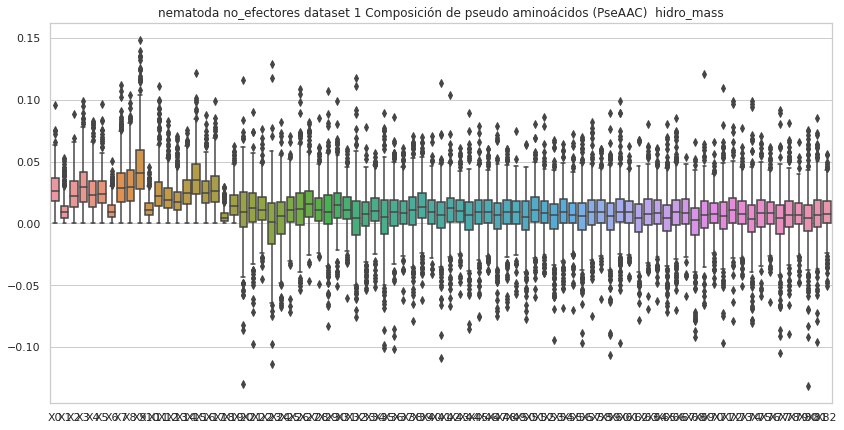

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.011033  0.005516  0.015859  0.013791  0.004137  0.041372  0.004827   
1    0.060499  0.005672  0.018906  0.020797  0.041593  0.024578  0.009453   
2    0.062182  0.021848  0.028570  0.028570  0.025209  0.020167  0.013445   
3    0.019429  0.019429  0.021588  0.034540  0.019429  0.051811  0.017270   
4    0.048666  0.029200  0.029200  0.077866  0.058399  0.097332  0.029200   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.053155  0.011145  0.042009  0.056584  0.025720  0.044581  0.018004   
496  0.040665  0.008133  0.032532  0.024399  0.024399  0.008133  0.016266   
497  0.042758  0.017492  0.073855  0.079685  0.054419  0.046645  0.023322   
498  0.059908  0.000000  0.035945  0.059908  0.047926  0.011982  0.000000   
499  0.017834 

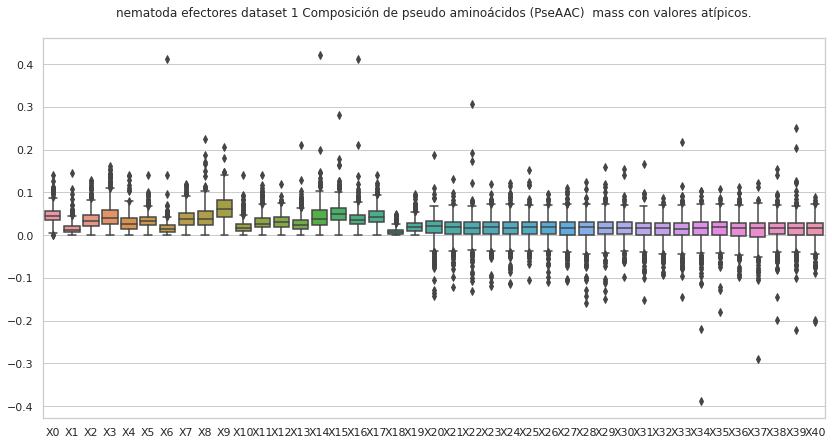

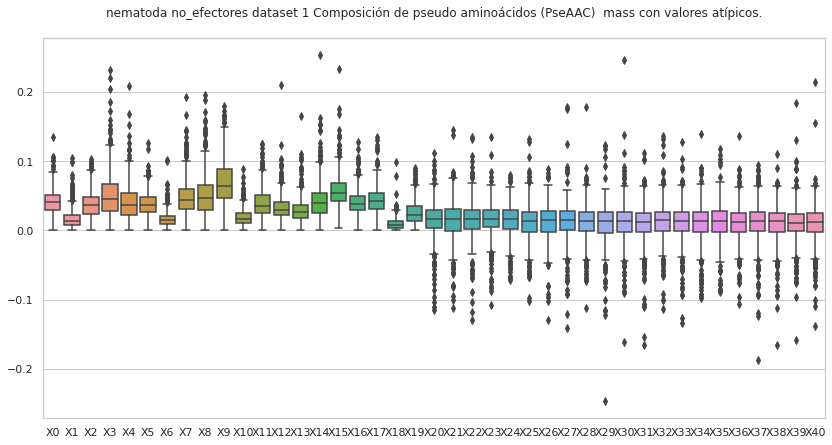

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.011033  0.005516  0.015859  0.013791  0.004137  0.041372  0.004827   
1    0.060499  0.005672  0.018906  0.020797  0.041593  0.024578  0.009453   
2    0.062182  0.021848  0.028570  0.028570  0.025209  0.020167  0.013445   
3    0.019429  0.019429  0.021588  0.034540  0.019429  0.051811  0.017270   
5    0.046636  0.002743  0.063095  0.052122  0.027433  0.030176  0.010973   
..        ...       ...       ...       ...       ...       ...       ...   
494  0.047831  0.020499  0.035684  0.032647  0.028091  0.034165  0.015944   
495  0.053155  0.011145  0.042009  0.056584  0.025720  0.044581  0.018004   
496  0.040665  0.008133  0.032532  0.024399  0.024399  0.008133  0.016266   
497  0.042758  0.017492  0.073855  0.079685  0.054419  0.046645  0.023322   
499  0.017834  0.008917 

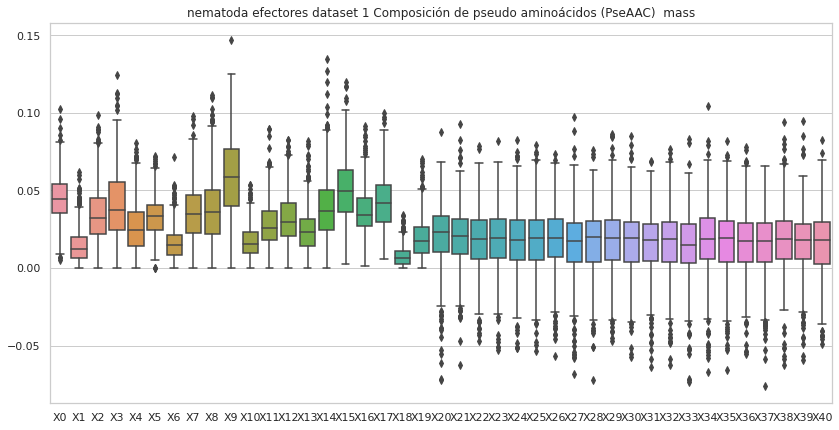

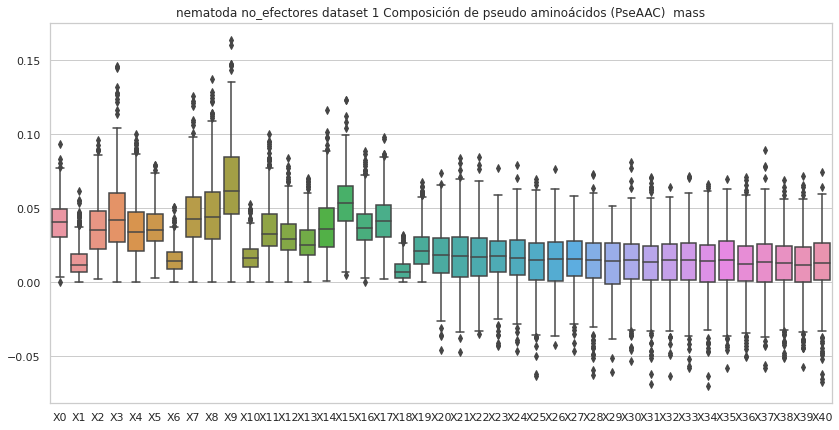

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores nematoda dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.016832  0.008416  0.024196  0.021040  0.006312  0.063121  0.007364   
1    0.037941  0.003557  0.011857  0.013042  0.026084  0.015413  0.005928   
2    0.100537  0.035324  0.046193  0.046193  0.040758  0.032607  0.021738   
3    0.023116  0.023116  0.025685  0.041096  0.023116  0.061644  0.020548   
4    0.046992  0.028195  0.028195  0.075187  0.056390  0.093984  0.028195   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.048572  0.010184  0.038387  0.051706  0.023503  0.040738  0.016452   
496  0.091767  0.018353  0.073414  0.055060  0.055060  0.018353  0.036707   
497  0.038059  0.015570  0.065738  0.070928  0.048439  0.041519  0.020760   
498  0.116485  0.000000  0.069891  0.116485  0.093188  0.023297  0.000000   
499  0.014713

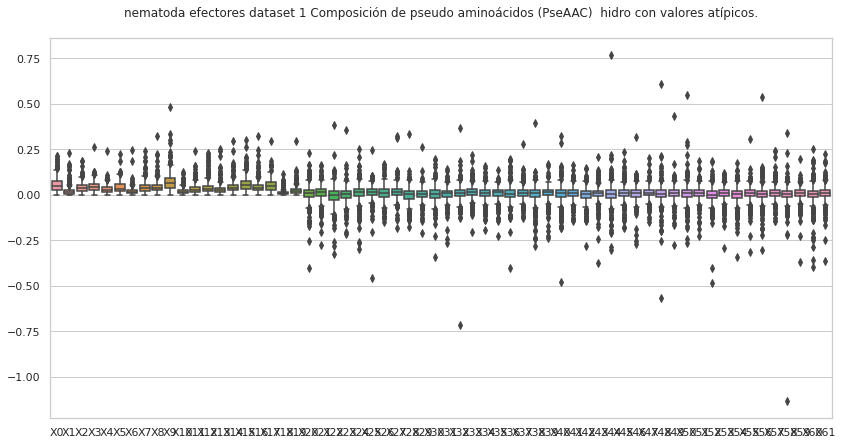

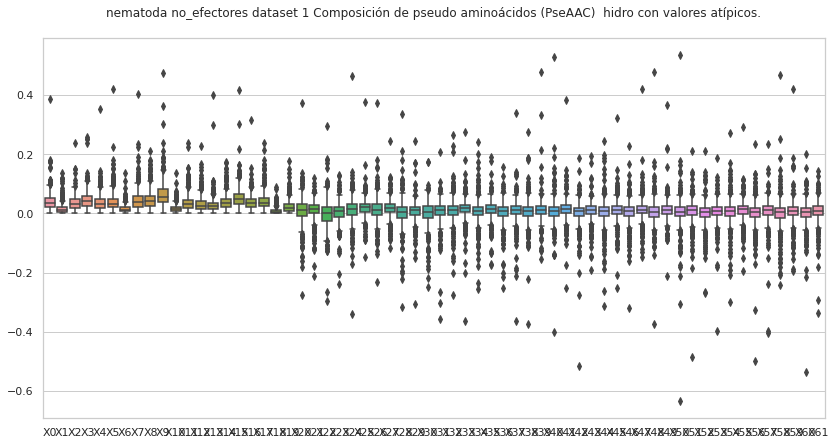

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores nematoda dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.016832  0.008416  0.024196  0.021040  0.006312  0.063121  0.007364   
1    0.037941  0.003557  0.011857  0.013042  0.026084  0.015413  0.005928   
2    0.100537  0.035324  0.046193  0.046193  0.040758  0.032607  0.021738   
3    0.023116  0.023116  0.025685  0.041096  0.023116  0.061644  0.020548   
5    0.032592  0.001917  0.044094  0.036426  0.019172  0.021089  0.007669   
..        ...       ...       ...       ...       ...       ...       ...   
492  0.053098  0.000000  0.019912  0.046461  0.006637  0.000000  0.006637   
494  0.069302  0.029701  0.051701  0.047301  0.040701  0.049501  0.023101   
495  0.048572  0.010184  0.038387  0.051706  0.023503  0.040738  0.016452   
497  0.038059  0.015570  0.065738  0.070928  0.048439  0.041519  0.020760   
499  0.014713  0.00

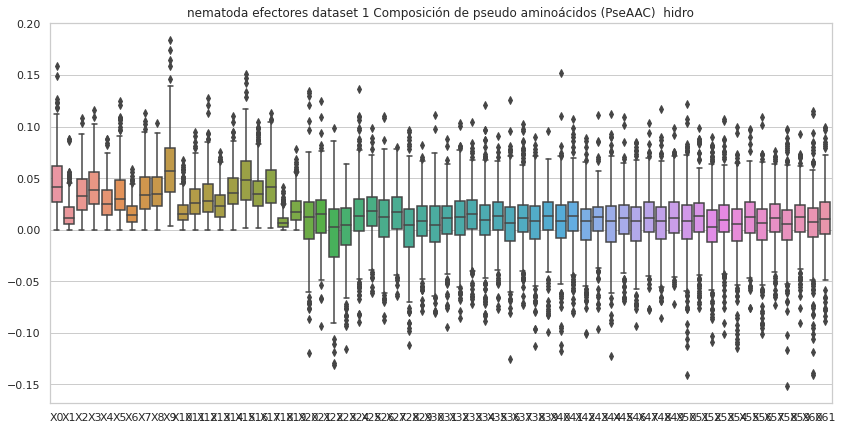

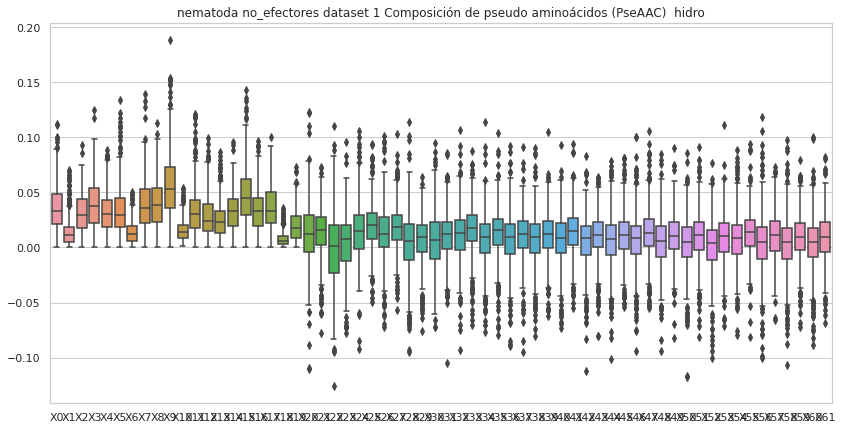

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.025211 -0.078576  0.435216 -0.017247 -0.049976  0.414317 -0.026065   
1   -0.011797 -0.009725  0.084725  0.136624 -0.033562  0.097687 -0.038754   
2   -0.012463 -0.014299 -0.011442  0.056073 -0.058643  0.068880 -0.024983   
3    0.056212  0.029135 -0.017337  0.000754  0.019356  0.031176  0.050343   
4    0.092383 -0.114493 -0.021033 -0.161981 -0.195468 -0.115002 -0.112935   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.021151 -0.012916  0.025724 -0.004460  0.019319 -0.000540  0.015006   
496 -0.022709  0.126096  0.111002  0.118960  0.057710 -0.056092  0.152603   
497 -0.008882 -0.014505  0.001263  0.008876 -0.024333 -0.009379  0.035413   
498  0.000425 -0.087246 -0.247833  0.080331  0.167989  0.061285 -0.160020   
499  0.061341 

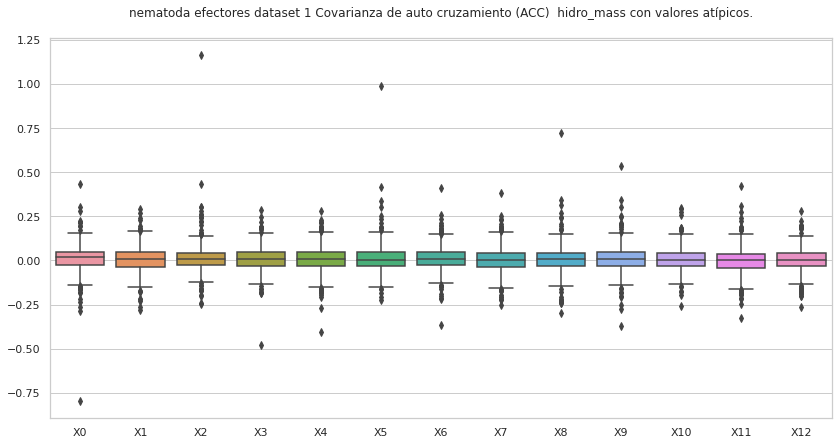

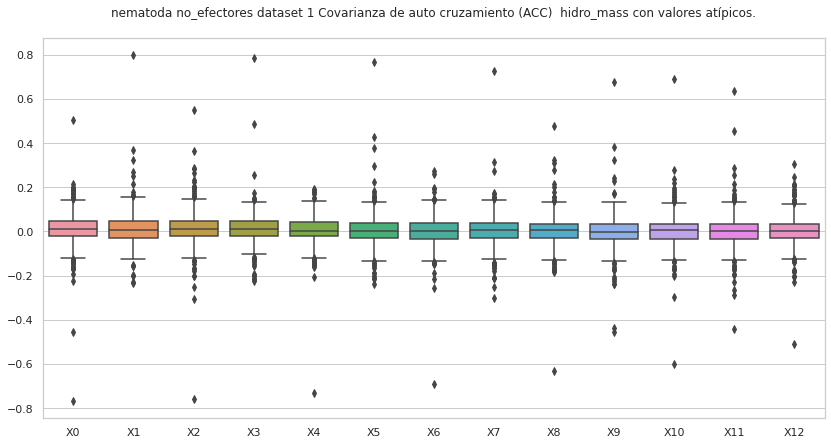

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
1   -0.011797 -0.009725  0.084725  0.136624 -0.033562  0.097687 -0.038754   
2   -0.012463 -0.014299 -0.011442  0.056073 -0.058643  0.068880 -0.024983   
3    0.056212  0.029135 -0.017337  0.000754  0.019356  0.031176  0.050343   
4    0.092383 -0.114493 -0.021033 -0.161981 -0.195468 -0.115002 -0.112935   
5    0.022282  0.061606  0.019112  0.042486 -0.015739  0.028194  0.079772   
..        ...       ...       ...       ...       ...       ...       ...   
494  0.027374  0.050105 -0.029213 -0.006676  0.009277  0.030228  0.018824   
495 -0.021151 -0.012916  0.025724 -0.004460  0.019319 -0.000540  0.015006   
496 -0.022709  0.126096  0.111002  0.118960  0.057710 -0.056092  0.152603   
497 -0.008882 -0.014505  0.001263  0.008876 -0.024333 -0.009379  0.035413   
499  0.061341 

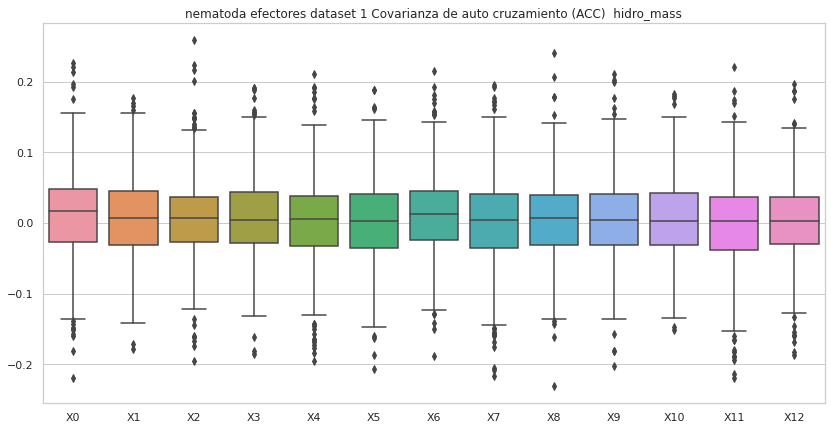

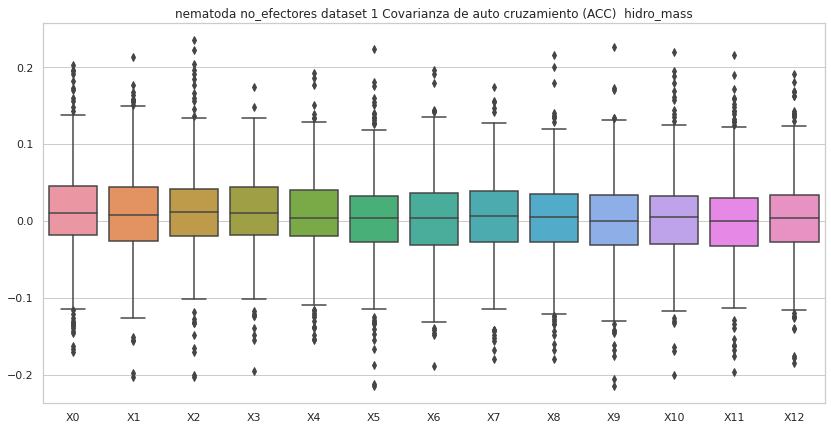

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.025211 -0.078576  0.435216 -0.017247 -0.049976  0.414317 -0.026065   
1   -0.011797 -0.009725  0.084725  0.136624 -0.033562  0.097687 -0.038754   
2   -0.012463 -0.014299 -0.011442  0.056073 -0.058643  0.068880 -0.024983   
3    0.056212  0.029135 -0.017337  0.000754  0.019356  0.031176  0.050343   
4    0.092383 -0.114493 -0.021033 -0.161981 -0.195468 -0.115002 -0.112935   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.021151 -0.012916  0.025724 -0.004460  0.019319 -0.000540  0.015006   
496 -0.022709  0.126096  0.111002  0.118960  0.057710 -0.056092  0.152603   
497 -0.008882 -0.014505  0.001263  0.008876 -0.024333 -0.009379  0.035413   
498  0.000425 -0.087246 -0.247833  0.080331  0.167989  0.061285 -0.160020   
499  0.061341  0.084

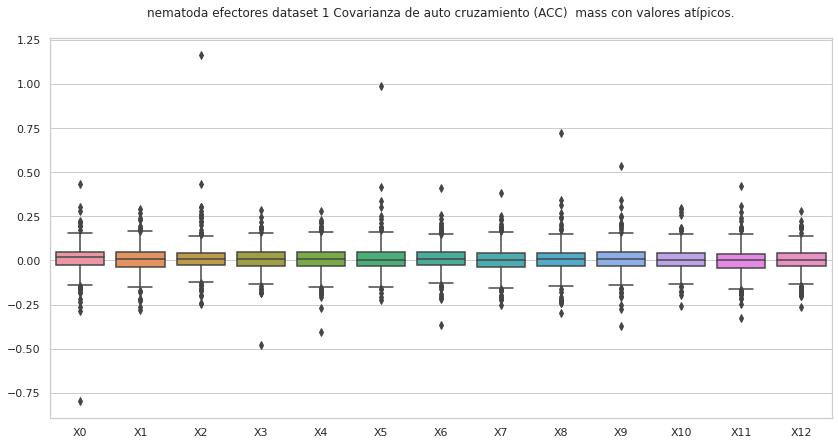

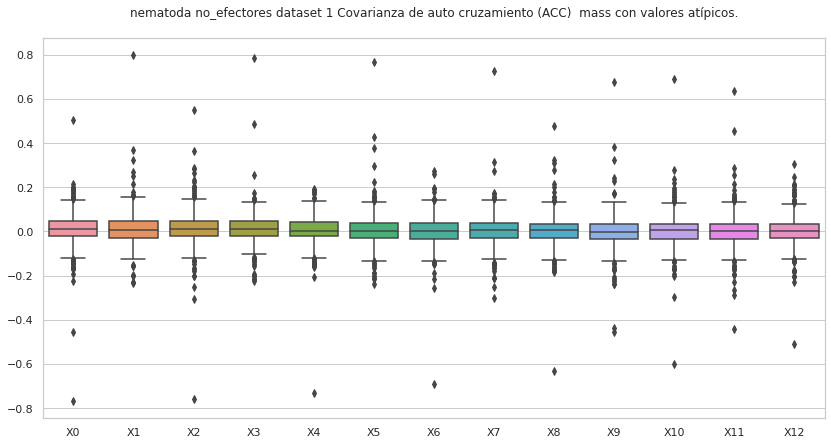

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
1   -0.011797 -0.009725  0.084725  0.136624 -0.033562  0.097687 -0.038754   
2   -0.012463 -0.014299 -0.011442  0.056073 -0.058643  0.068880 -0.024983   
3    0.056212  0.029135 -0.017337  0.000754  0.019356  0.031176  0.050343   
4    0.092383 -0.114493 -0.021033 -0.161981 -0.195468 -0.115002 -0.112935   
5    0.022282  0.061606  0.019112  0.042486 -0.015739  0.028194  0.079772   
..        ...       ...       ...       ...       ...       ...       ...   
494  0.027374  0.050105 -0.029213 -0.006676  0.009277  0.030228  0.018824   
495 -0.021151 -0.012916  0.025724 -0.004460  0.019319 -0.000540  0.015006   
496 -0.022709  0.126096  0.111002  0.118960  0.057710 -0.056092  0.152603   
497 -0.008882 -0.014505  0.001263  0.008876 -0.024333 -0.009379  0.035413   
499  0.061341  0.084701 -0.003

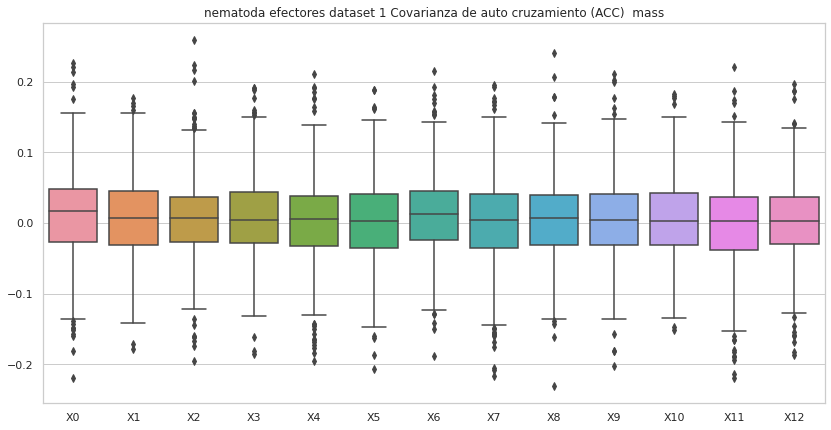

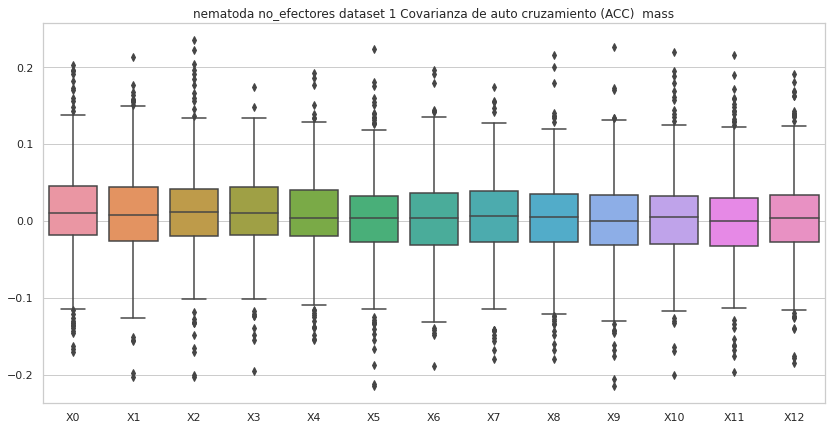

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores nematoda dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.039602 -0.006943  0.010522 -0.006757  0.006104  0.073556 -0.038334   
1    0.097353  0.083211  0.040260 -0.000851  0.083741  0.056525  0.058509   
2   -0.021780 -0.092868  0.106863  0.036129 -0.108825  0.055048  0.036694   
3   -0.057560 -0.046682  0.035556 -0.108565  0.077530 -0.000855 -0.015301   
4   -0.217609 -0.083398 -0.071533  0.103998 -0.079001 -0.082309 -0.089237   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.055506 -0.024264 -0.015286  0.036777 -0.009313 -0.058018  0.001881   
496 -0.102627 -0.089111  0.021388 -0.149801  0.047335  0.119571 -0.053517   
497  0.064801 -0.149521  0.036341  0.130045  0.016815  0.014176  0.014433   
498 -0.100908 -0.235718  0.115631 -0.211028  0.051729  0.164477 -0.024101   
499 -0.003238 -0.00

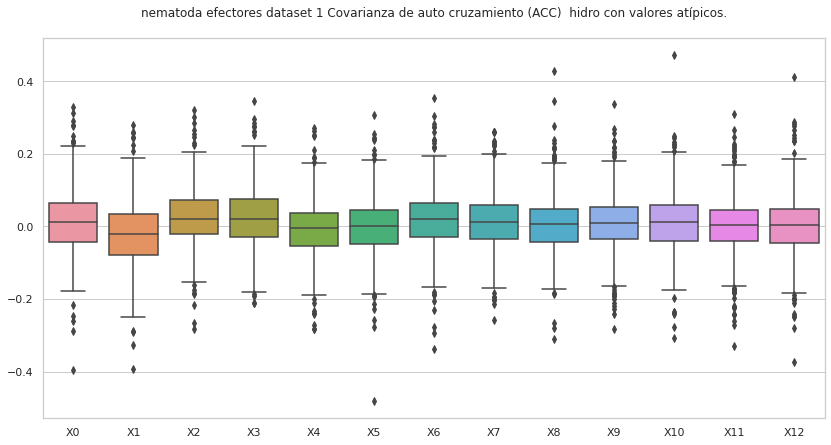

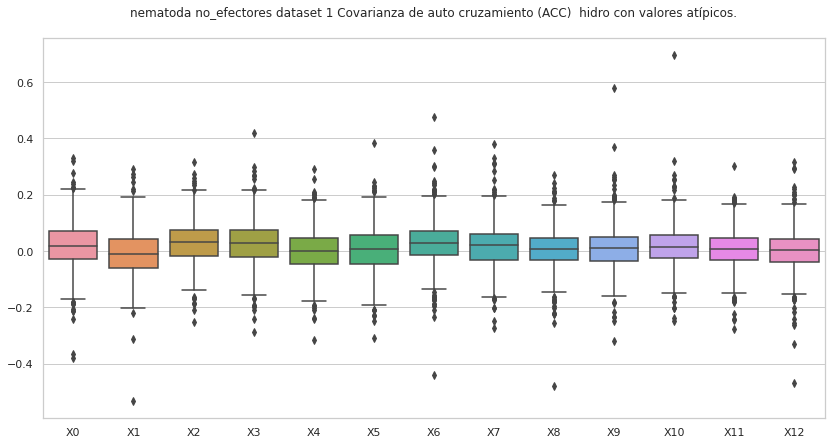

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores nematoda dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.039602 -0.006943  0.010522 -0.006757  0.006104  0.073556 -0.038334   
1    0.097353  0.083211  0.040260 -0.000851  0.083741  0.056525  0.058509   
2   -0.021780 -0.092868  0.106863  0.036129 -0.108825  0.055048  0.036694   
3   -0.057560 -0.046682  0.035556 -0.108565  0.077530 -0.000855 -0.015301   
4   -0.217609 -0.083398 -0.071533  0.103998 -0.079001 -0.082309 -0.089237   
..        ...       ...       ...       ...       ...       ...       ...   
494 -0.018124 -0.005536 -0.028179 -0.059781  0.008017 -0.081402 -0.002145   
495  0.055506 -0.024264 -0.015286  0.036777 -0.009313 -0.058018  0.001881   
497  0.064801 -0.149521  0.036341  0.130045  0.016815  0.014176  0.014433   
498 -0.100908 -0.235718  0.115631 -0.211028  0.051729  0.164477 -0.024101   
499 -0.003238 -0.002208  

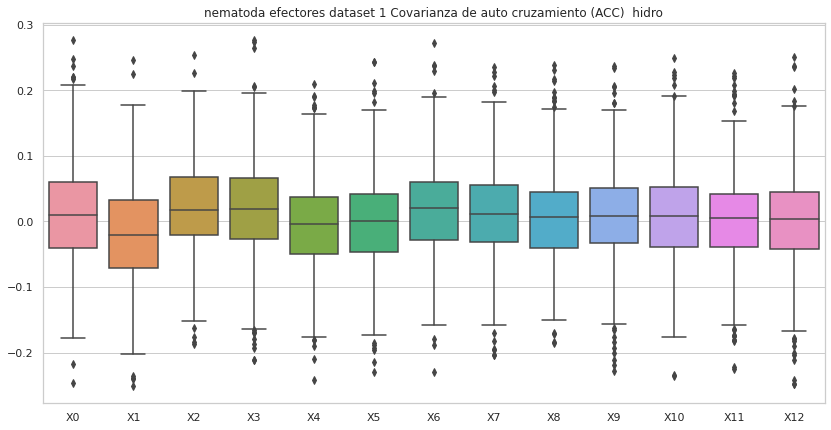

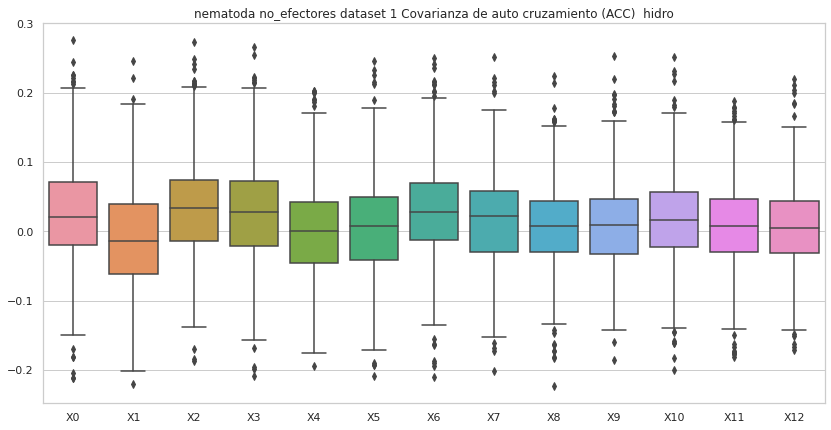

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))